In [1]:
import pandas as pd
import numpy as np
from typing import (List, Tuple, Dict, Union)
from data_service import (get_shibor_data, get_interpld_shibor,
                          query_china_shibor_all)

from scr.calc_func import get_daily_vix,prepare_data2calc


本篇算法来源：
>《20180707_东北证券_金融工程_市场波动风险度量：vix与skew指数构建与应用》

In [2]:
opt_data = pd.read_csv('opt_data.csv', index_col=[0])

shibor_df = get_shibor_data('2015-02-09', '2022-05-27')
# 插值
interpld_shibor = get_interpld_shibor(shibor_df)

In [3]:
data_all = prepare_data2calc(opt_data,interpld_shibor)

In [5]:
# vix = data_all.groupby('date').apply(lambda x:get_daily_vix(x).vix)

e:\WorkSpace\Quantitative-analysis\C-择时类\C-VIX中国版VIX编制手册\scr\calc_func.py:167: UserWarning: F:2.7309,strike_marix中最小执行价为:2.7500,故开跌部分无数据,无中间价K0.
  warnings.warn('F:%.4f,strike_marix中最小执行价为:%.4f,故开跌部分无数据,无中间价K0.' %
e:\WorkSpace\Quantitative-analysis\C-择时类\C-VIX中国版VIX编制手册\scr\calc_func.py:167: UserWarning: F:2.7550,strike_marix中最小执行价为:2.8000,故开跌部分无数据,无中间价K0.
  warnings.warn('F:%.4f,strike_marix中最小执行价为:%.4f,故开跌部分无数据,无中间价K0.' %
e:\WorkSpace\Quantitative-analysis\C-择时类\C-VIX中国版VIX编制手册\scr\calc_func.py:167: UserWarning: F:2.4662,strike_marix中最小执行价为:2.5000,故开跌部分无数据,无中间价K0.
  warnings.warn('F:%.4f,strike_marix中最小执行价为:%.4f,故开跌部分无数据,无中间价K0.' %
e:\WorkSpace\Quantitative-analysis\C-择时类\C-VIX中国版VIX编制手册\scr\calc_func.py:167: UserWarning: F:2.4619,strike_marix中最小执行价为:2.5000,故开跌部分无数据,无中间价K0.
  warnings.warn('F:%.4f,strike_marix中最小执行价为:%.4f,故开跌部分无数据,无中间价K0.' %
e:\WorkSpace\Quantitative-analysis\C-择时类\C-VIX中国版VIX编制手册\scr\calc_func.py:167: UserWarning: F:2.3890,strike_marix中最小执行价为:2.4000,故开跌部分无数据,无中间价K0.

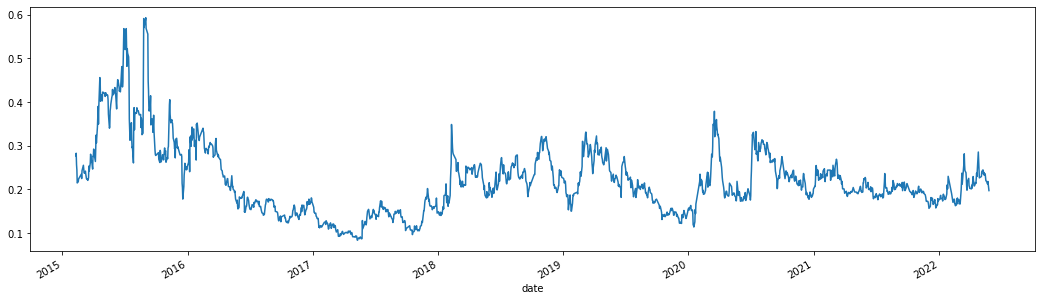

In [6]:
vix.plot(figsize=(18,5));

In [5]:
cvix_func = CVIX(data_all)

cvix_func.vix()

e:\WorkSpace\Quantitative-analysis\C-择时类\C-VIX中国版VIX编制手册\scr\calc_func.py:167: UserWarning: F:2.7309,strike_marix中最小执行价为:2.7500,故开跌部分无数据,无中间价K0.
  warnings.warn('F:%.4f,strike_marix中最小执行价为:%.4f,故开跌部分无数据,无中间价K0.' %
e:\WorkSpace\Quantitative-analysis\C-择时类\C-VIX中国版VIX编制手册\scr\calc_func.py:167: UserWarning: F:2.7550,strike_marix中最小执行价为:2.8000,故开跌部分无数据,无中间价K0.
  warnings.warn('F:%.4f,strike_marix中最小执行价为:%.4f,故开跌部分无数据,无中间价K0.' %
e:\WorkSpace\Quantitative-analysis\C-择时类\C-VIX中国版VIX编制手册\scr\calc_func.py:167: UserWarning: F:2.4662,strike_marix中最小执行价为:2.5000,故开跌部分无数据,无中间价K0.
  warnings.warn('F:%.4f,strike_marix中最小执行价为:%.4f,故开跌部分无数据,无中间价K0.' %
e:\WorkSpace\Quantitative-analysis\C-择时类\C-VIX中国版VIX编制手册\scr\calc_func.py:167: UserWarning: F:2.4619,strike_marix中最小执行价为:2.5000,故开跌部分无数据,无中间价K0.
  warnings.warn('F:%.4f,strike_marix中最小执行价为:%.4f,故开跌部分无数据,无中间价K0.' %
e:\WorkSpace\Quantitative-analysis\C-择时类\C-VIX中国版VIX编制手册\scr\calc_func.py:167: UserWarning: F:2.3890,strike_marix中最小执行价为:2.4000,故开跌部分无数据,无中间价K0.

date
2015-02-09    0.276918
2015-02-10    0.282715
2015-02-11    0.256280
2015-02-12    0.244684
2015-02-13    0.214627
                ...   
2022-05-23    0.212181
2022-05-24    0.218026
2022-05-25    0.210586
2022-05-26    0.203073
2022-05-27    0.197067
Length: 1774, dtype: float64

In [26]:
def calc_p_values(K: np.ndarray, Q_K: np.ndarray, delta_K: np.ndarray,
                  epsilons: Tuple, rate: float, term: float,
                  F: float) -> Tuple:

    e1, e2, e3 = epsilons
    e_rt: float = np.exp(rate * term)
    p1: float = e_rt * (-1 * np.sum((Q_K * delta_K) / np.square(K))) + e1

    p2: float = e_rt * np.sum(
        (2 * Q_K * delta_K) / np.square(K) * (1 - np.log(K / F))) + e2

    p3: float = e_rt * np.sum(
        (3 * Q_K * delta_K) / np.square(K) *
        (2 * np.log(K / F) - np.square(np.log(K / F)))) + e3

    return p1, p2, p3

In [32]:
next_variable

,Q_K,K,delta_k,F,K0,term,term_rate,sigma,espilons,P
trade_date,,,,,,,,,,
2015-02-09,"[0.088, 0.1111, 0.13965, 0.1261, 0.1008]","[2.2, 2.25, 2.3, 2.35, 2.4]","[0.04999999999999982, 0.04999999999999982, 0.0...",2.314039,2.30,0.197260,0.050621,0.054527,"(1.855472196643504e-05, -5.5777139309679384e-0...","(-0.0053780768428445345, 0.010808693367309115,..."
2015-02-10,"[0.0645, 0.0829, 0.102, 0.1308, 0.1095, 0.0898]","[2.2, 2.25, 2.3, 2.35, 2.4, 2.45]","[0.04999999999999982, 0.04999999999999982, 0.0...",2.357676,2.35,0.194521,0.051059,0.055314,"(5.322846653665891e-06, -1.5985902485003924e-0...","(-0.005379858194249818, 0.010888685312507923, ..."
2015-02-11,"[0.046, 0.0598, 0.0776, 0.11445, 0.1058, 0.0847]","[2.2, 2.25, 2.3, 2.35, 2.4, 2.45]","[0.04999999999999982, 0.04999999999999982, 0.0...",2.381115,2.35,0.191781,0.051345,0.046052,"(8.688805135514954e-05, -0.0002618082913905855...","(-0.004416681615488346, 0.008912409671387865, ..."
2015-02-12,"[0.0372, 0.0506, 0.0687, 0.10875, 0.1048, 0.08...","[2.2, 2.25, 2.3, 2.35, 2.4, 2.45, 2.5]","[0.04999999999999982, 0.04999999999999982, 0.0...",2.390810,2.35,0.189041,0.052252,0.047757,"(0.00014906252643465123, -0.000449757638322629...","(-0.004515754719200597, 0.00900431293468865, -..."
2015-02-13,"[0.0265, 0.0372, 0.0521, 0.09965, 0.0977, 0.07...","[2.2, 2.25, 2.3, 2.35, 2.4, 2.45, 2.5]","[0.04999999999999982, 0.04999999999999982, 0.0...",2.398485,2.35,0.186301,0.052595,0.040748,"(0.00020995699649195565, -0.000634166049947616...","(-0.003798583348748297, 0.007490536761159945, ..."
...,...,...,...,...,...,...,...,...,...,...
2022-05-23,"[0.0321, 0.0425, 0.0534, 0.067, 0.0832, 0.1035...","[2.45, 2.5, 2.55, 2.6, 2.65, 2.7, 2.75, 2.8, 2...","[0.04999999999999982, 0.04999999999999982, 0.0...",2.778750,2.75,0.350685,0.020195,0.043146,"(5.427097447641138e-05, -0.0001633778467111186...","(-0.007565698651282938, 0.014981891217014712, ..."
2022-05-24,"[0.0402, 0.0504, 0.065, 0.0813, 0.0997, 0.1394...","[2.45, 2.5, 2.55, 2.6, 2.65, 2.7, 2.75, 2.8, 2...","[0.04999999999999982, 0.04999999999999982, 0.0...",2.734593,2.70,0.347945,0.020024,0.042818,"(8.138227872600545e-05, -0.0002451840019829683...","(-0.007449910936020807, 0.014671945808643685, ..."
2022-05-25,"[0.037, 0.0482, 0.0598, 0.0749, 0.0926, 0.1352...","[2.45, 2.5, 2.55, 2.6, 2.65, 2.7, 2.75, 2.8, 2...","[0.04999999999999982, 0.04999999999999982, 0.0...",2.743656,2.70,0.345205,0.020064,0.041486,"(0.0001293255878795918, -0.0003900538754449806...","(-0.007161955479582073, 0.014078647516363866, ..."


In [28]:

next_variable = pd.DataFrame(cvix_func.variable_dict['next'])
near_variable = pd.DataFrame(cvix_func.variable_dict['near'])

next_s = _get_s(next_variable)
near_s = _get_s(near_variable)
df = pd.concat((near_variable['term'],next_variable['term'],near_s,next_s),axis=1)
df.columns = ['t1','t2','p1','p2']

In [29]:
df['w'] = df.apply(lambda x:calc_weight(x['t1'],x['t2']),axis=1)

<AxesSubplot:xlabel='trade_date'>

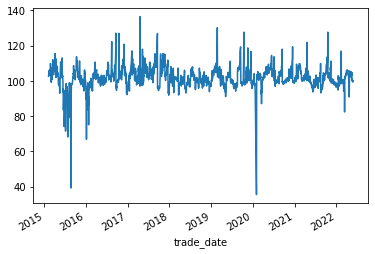

In [30]:
df.apply(lambda x:100 - 10 * (x['w'] * x['p1'] + (1-x['w']) * x['p1']),axis=1).plot()

In [21]:
calc_epsilons(2.778,2.75)

(5.14855281461557e-05, -0.00015497859056502446, 2.095074112924198e-06)

In [22]:
F0,K0 = 2.778,2.75

In [34]:
test =  pd.DataFrame(cvix_func.variable_dict['next'])
test.set_index('trade_date', inplace=True)

In [35]:
# df['espilons'] = df.apply(lambda x: calc_epsilons(x['F'], x['K0']), axis=1)

# df['P'] = df.apply(lambda x: calc_p_values(x['K'], x['Q_K'], x[
#     'delta_k'], x['espilons'], x['term_rate'], x['term'], x['F']),
                    # axis=1)

ValueError: Length of values (3) does not match length of index (1774)